# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   https://www.kaggle.com/datasets/wlwwwlw/elite-sports-cars-in-data/data
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [361]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import sys, warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [362]:
df = pd.read_csv('/content/Elite Sports Cars in Data.csv') #buka dataset
df.head() #baca dataset

,Brand,Model,Year,Country,Condition,Engine_Size,Horsepower,Torque,Weight,Top_Speed,...,Mileage,Popularity,Safety_Rating,Number_of_Owners,Market_Demand,Insurance_Cost,Production_Units,Log_Price,Log_Mileage,Modification
0,Nissan,720S,2006,Asia,used,3.7,420,705,1785,238,...,96664,Low,2,4,Medium,13410,5000,11.309352,11.479007,V-Spec
1,McLaren,911 Turbo S,2009,Europe,new,5.3,1104,766,992,386,...,159630,High,2,2,Medium,10795,1000,12.639334,11.980620,NaN
2,Chevrolet,M4 Competition,2009,USA,new,5.5,153,1573,2022,397,...,111496,High,1,2,Low,1716,20000,12.948902,11.621753,NaN
3,Bugatti,Chiron,1982,Asia,used,5.4,544,1009,1091,151,...,217228,High,2,4,Medium,11618,20000,11.725542,12.288707,NaN
4,Nissan,Chiron,2022,Europe,new,2.4,980,693,1232,385,...,150318,Low,3,2,Medium,11324,100000,11.229289,11.920515,NaN


In [363]:
df.info() #tampilkan info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               5000 non-null   object 
 1   Model               5000 non-null   object 
 2   Year                5000 non-null   int64  
 3   Country             5000 non-null   object 
 4   Condition           5000 non-null   object 
 5   Engine_Size         5000 non-null   float64
 6   Horsepower          5000 non-null   int64  
 7   Torque              5000 non-null   int64  
 8   Weight              5000 non-null   int64  
 9   Top_Speed           5000 non-null   int64  
 10  Acceleration_0_100  5000 non-null   float64
 11  Fuel_Type           5000 non-null   object 
 12  Drivetrain          5000 non-null   object 
 13  Transmission        5000 non-null   object 
 14  Fuel_Efficiency     5000 non-null   float64
 15  CO2_Emissions       5000 non-null   int64  
 16  Price 

In [364]:
df.describe() #tampilkan deskripsi dataset

,Year,Engine_Size,Horsepower,Torque,Weight,Top_Speed,Acceleration_0_100,Fuel_Efficiency,CO2_Emissions,Price,Mileage,Safety_Rating,Number_of_Owners,Insurance_Cost,Production_Units,Log_Price,Log_Mileage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2001.904800,4.828700,822.891600,938.800600,1689.724200,274.857000,4.517280,10.038340,272.695200,262067.329400,126487.020800,2.502200,2.479200,7749.857800,26496.010000,12.266985,11.449482
std,12.873697,1.858353,401.362549,472.954278,465.786421,72.062214,1.448473,2.881613,100.154245,137678.803906,72773.504601,1.119038,1.114368,4177.751738,36767.027776,0.741124,0.973881
min,1980.000000,1.600000,130.000000,120.000000,900.000000,150.000000,2.000000,5.000000,100.000000,20014.000000,47.000000,1.000000,1.000000,501.000000,50.000000,9.904237,3.871201
25%,1991.000000,3.200000,472.000000,522.000000,1286.000000,214.000000,3.300000,7.600000,186.000000,143710.750000,63809.750000,1.000000,1.000000,4106.750000,1000.000000,11.875565,11.063677
50%,2002.000000,4.800000,815.500000,948.000000,1684.000000,275.000000,4.500000,10.000000,273.000000,265213.500000,126762.500000,3.000000,2.000000,7697.500000,5000.000000,12.488294,11.750078
75%,2013.000000,6.500000,1176.000000,1345.000000,2101.000000,337.000000,5.800000,12.600000,357.000000,380923.500000,190287.500000,3.000000,3.000000,11351.750000,20000.000000,12.850356,12.156297
max,2024.000000,8.000000,1521.000000,1758.000000,2499.000000,399.000000,7.000000,15.000000,449.000000,499991.000000,249956.000000,4.000000,4.000000,14998.000000,100000.000000,13.122347,12.429044


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

**Memahami Sturtur Data**

In [365]:
df.shape #cek jumlah baris dan kolom

(5000, 27)

In [366]:
categorical_columns = [] #simpan kolom kategorikal

for col in df.columns: #iterasi
    if df[col].dtype == 'object':
        categorical_columns.append(col)#tambah ke daftar kategorikal

#tampilkan
print('Daftar kolom kategorikal:', categorical_columns)
print('Total kolom kategorikal:', len(categorical_columns))

Daftar kolom kategorikal: ['Brand', 'Model', 'Country', 'Condition', 'Fuel_Type', 'Drivetrain', 'Transmission', 'Popularity', 'Market_Demand', 'Modification']
Total kolom kategorikal: 10


In [367]:
numerical_columns = [] #simpan ke kolom numerikal

for col in df.columns: #iterasi
    if df[col].dtype != 'object':
        numerical_columns.append(col)#tambah ke daftar numerikal

#tampilkan
print('Daftar kolom numerikal:', numerical_columns)
print('Total kolom numerikal:', len(numerical_columns))

Daftar kolom numerikal: ['Year', 'Engine_Size', 'Horsepower', 'Torque', 'Weight', 'Top_Speed', 'Acceleration_0_100', 'Fuel_Efficiency', 'CO2_Emissions', 'Price', 'Mileage', 'Safety_Rating', 'Number_of_Owners', 'Insurance_Cost', 'Production_Units', 'Log_Price', 'Log_Mileage']
Total kolom numerikal: 17


**Menangani Data yang Hilang**

In [368]:
df.isna().sum() #cari data yg hilang

,0
Brand,0
Model,0
Year,0
Country,0
Condition,0
Engine_Size,0
Horsepower,0
Torque,0
Weight,0
Top_Speed,0


**Analisis Distribusi dan Korelasi**

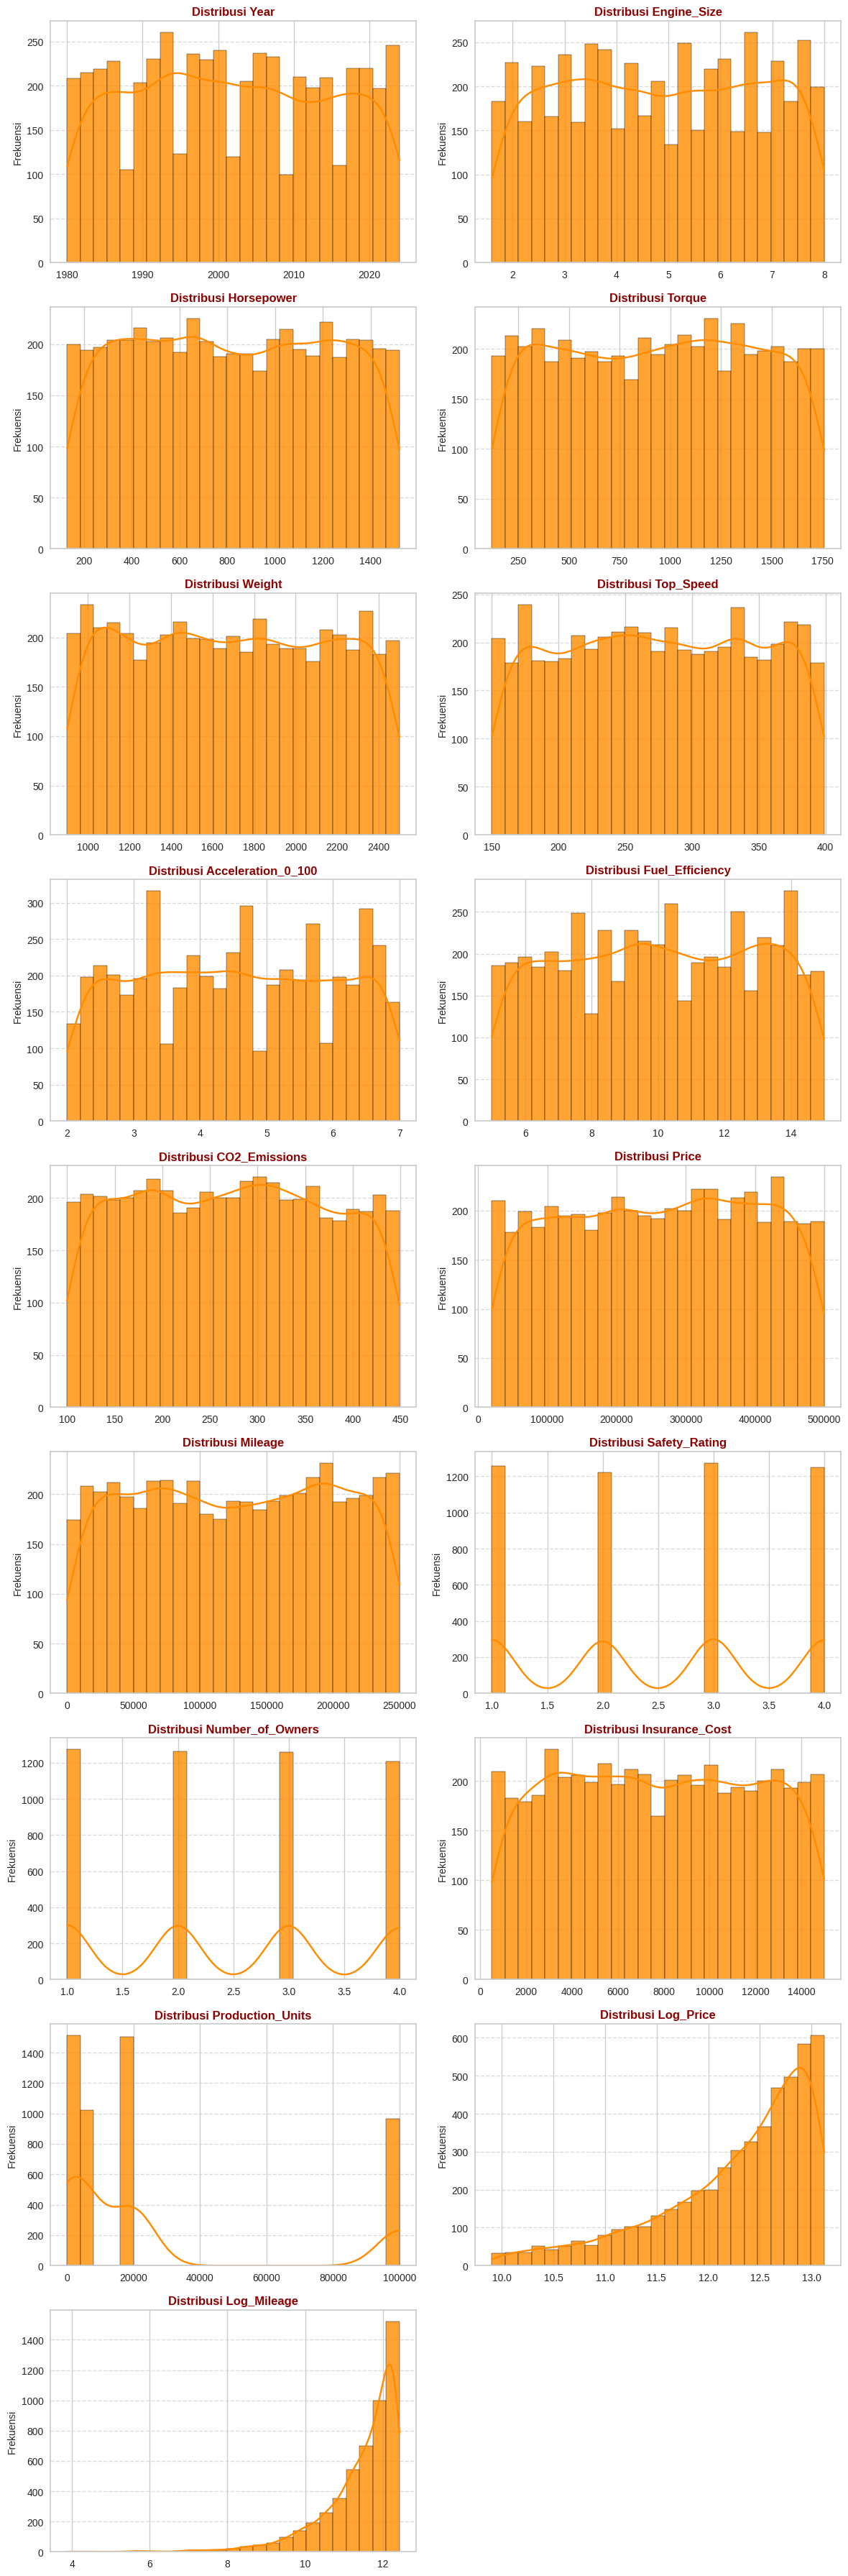

In [369]:
num_columns = df.select_dtypes(include=[np.number]) #pilih kolom numerik

n_columns = len(num_columns.columns)#hitung jumlah kolom numerik

cols = 2  #atur jumlah kolom per baris
rows = (n_columns + cols - 1) // cols

plt.figure(figsize=(12, 4 * rows))  #buat plotnya

for i, column in enumerate(num_columns.columns, 1):#buat histogram warna
    plt.subplot(rows, cols, i)
    sns.histplot(num_columns[column], bins=25,
                                            kde=True,
                                            color='darkorange',
                                            edgecolor='black',
                                            alpha=0.8)
    plt.title(f'Distribusi {column}', fontsize=12,
                                          fontweight='bold',
                                          color='darkred') #tambah elemen visual
    plt.xlabel('')
    plt.ylabel('Frekuensi', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()#rapikan layout
plt.show()

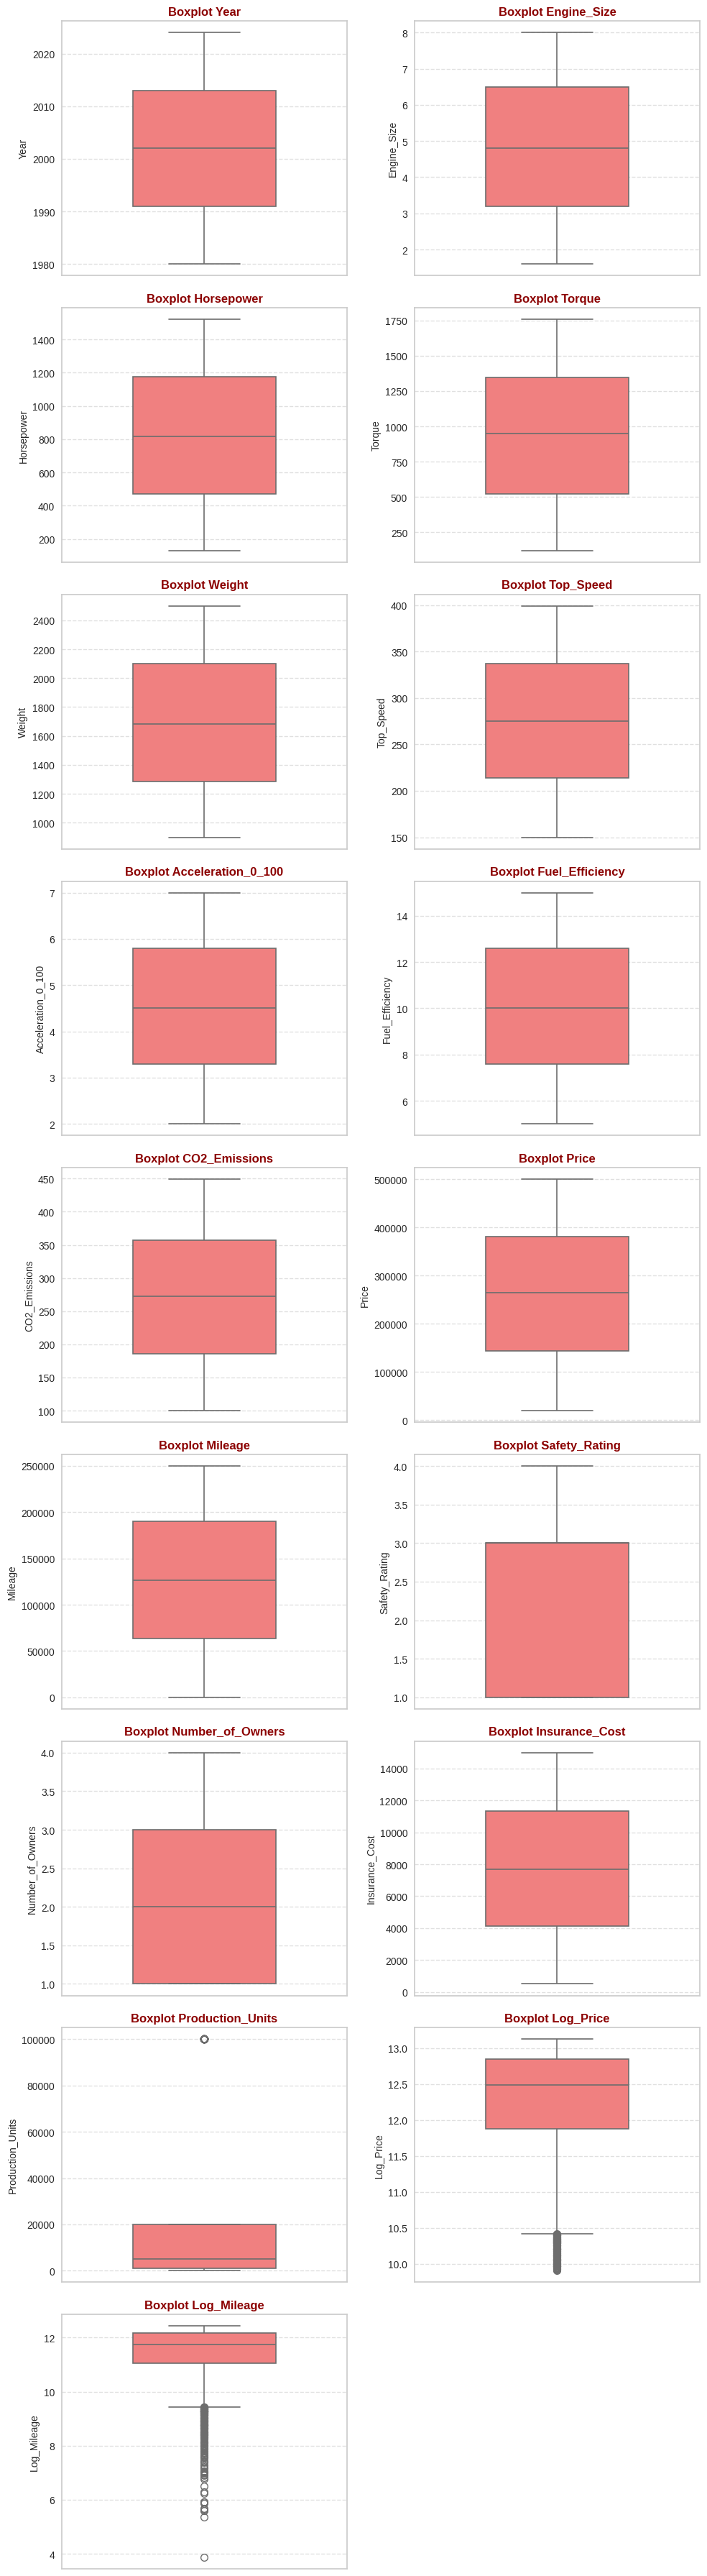

In [370]:
num_columns = df.select_dtypes(include='number') #pilih kolom numerik

n_columns = len(num_columns.columns)#hitung jumlah kolom numerik

cols = 2  #membuat tampilan subplot menjadi 2
rows = (n_columns + cols - 1) // cols

plt.figure(figsize=(10, 4 * rows)) #atur ukuran gambar

for i, column in enumerate(num_columns.columns, 1): #buat boxplot
    plt.subplot(rows, cols, i)
    sns.boxplot(y=num_columns[column], color='salmon',
                                              width=0.5,
                                              linewidth=1.2,
                                              boxprops={'facecolor': 'lightcoral'})

    #sesuaikan agar tambah menarik
    plt.title(f'Boxplot {column}', fontsize=12,
                                    fontweight='bold',
                                    color='darkred')
    plt.ylabel(column, fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout() #rapikan layout
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

**Menghapus atau Menangani Data Kosong (Missing Values)**

In [371]:
# Menampilkan nilai hilang sebelum penghapusan
missing_before = df.isnull().sum()

# Menghapus baris nilai kosong
df_cleaned = df.dropna()

# Menampilkan nilai hilang setelah penghapusan
missing_after = df_cleaned.isnull().sum()

comparison = pd.DataFrame({'Sebelum Penghapusan': missing_before, #comparasi hasil
                           'Setelah Penghapusan': missing_after})

print("Perbandingan nilai yang hilang sebelum dan setelah pembersihan:\n") #tampilan
print(comparison)

Perbandingan nilai yang hilang sebelum dan setelah pembersihan:

                    Sebelum Penghapusan  Setelah Penghapusan
Brand                                 0                    0
Model                                 0                    0
Year                                  0                    0
Country                               0                    0
Condition                             0                    0
Engine_Size                           0                    0
Horsepower                            0                    0
Torque                                0                    0
Weight                                0                    0
Top_Speed                             0                    0
Acceleration_0_100                    0                    0
Fuel_Type                             0                    0
Drivetrain                            0                    0
Transmission                          0                    0
Fuel_Efficiency     

**Menghapus Data Duplikat**

In [372]:
#simpan data sebelum penghapusan duplikat
size_before = df.shape

#hapus duplikat dari DataFrame
df_cleaned = df.drop_duplicates()

#simpan data setelah penghapusan duplikat
size_after = df_cleaned.shape

#buat perbandingan
comparison = pd.DataFrame({'Sebelum Penghapusan': [size_before],
                           'Setelah Penghapusan': [size_after]},
                           index=['Ukuran Data'])

#tampilkan
print("Perbandingan ukuran data sebelum dan setelah penghapusan duplikat:\n")
print(comparison)

Perbandingan ukuran data sebelum dan setelah penghapusan duplikat:

            Sebelum Penghapusan Setelah Penghapusan
Ukuran Data          (5000, 27)          (5000, 27)


**Normalisasi atau Standarisasi Fitur**

In [373]:
#stndarisasi standarcaler
scaler = StandardScaler()
df_transformed = df.copy()
df_transformed[numerical_columns] = scaler.fit_transform(df_transformed[numerical_columns])

# Menampilkan beberapa baris pertama setelah transformasi
df_transformed[numerical_columns].head()

,Year,Engine_Size,Horsepower,Torque,Weight,Top_Speed,Acceleration_0_100,Fuel_Efficiency,CO2_Emissions,Price,Mileage,Safety_Rating,Number_of_Owners,Insurance_Cost,Production_Units,Log_Price,Log_Mileage
0,0.318138,-0.607426,-1.003910,-0.494390,0.204569,-0.511512,0.816611,0.160225,0.342554,-1.311062,-0.409847,-0.448823,1.364856,1.354965,-0.584713,-1.292266,0.030319
1,0.551194,0.253637,0.700455,-0.365401,-1.498099,1.542474,0.057114,-0.221544,-1.594652,0.336960,0.455472,-0.448823,-0.430063,0.728968,-0.693517,0.502462,0.545438
2,0.551194,0.361270,-1.669211,1.341066,0.713436,1.695135,1.507062,-1.748619,0.482352,1.149941,-0.206016,-1.342538,-0.430063,-1.444428,-0.176698,0.920205,0.176909
3,-1.546315,0.307453,-0.694932,0.148442,-1.285534,-1.718923,-1.254744,-0.950375,0.702035,-1.005174,1.247021,-0.448823,1.364856,0.925983,-0.176698,-0.730644,0.861819
4,1.561106,-1.307040,0.391477,-0.519765,-0.982789,1.528596,-1.047608,-1.401557,-0.266568,-1.356658,0.327501,0.444891,-0.430063,0.855604,1.999382,-1.400306,0.483714


**Deteksi dan Penanganan Outlier**

In [374]:
def remove_outliers(data, columns):

    cleaned_data = data.copy()

    for col in columns: #hapus outlier berdasarkan IQR
        Q1 = cleaned_data[col].quantile(0.25)
        Q3 = cleaned_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]

    return cleaned_data

size_before = df.shape #simpan data sebelum penghapusan outlier

df_cleaned = remove_outliers(df, numerical_columns) #hapus outlier kolom numerik

size_after = df_cleaned.shape #simpan data setelah penghapusan outlier

#buat perbandingan
comparison = pd.DataFrame({'Sebelum Penghapusan': [size_before],
                           'Setelah Penghapusan': [size_after]},
                          index=['Ukuran Data'])

# Menampilkan hasil perbandingan
print("Perbandingan ukuran data sebelum dan setelah penghapusan outlier:\n")
print(comparison)

Perbandingan ukuran data sebelum dan setelah penghapusan outlier:

            Sebelum Penghapusan Setelah Penghapusan
Ukuran Data          (5000, 27)          (3738, 27)


**Encoding Data Kategorikal**

In [375]:
#oneshot pada kategorikal
df_transformed = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

#tampilkan hasil encoding
print("Data setelah One-Hot Encoding:\n", df_transformed.head())

Data setelah One-Hot Encoding:
    Year  Engine_Size  Horsepower  Torque  Weight  Top_Speed  \
0  2006          3.7         420     705    1785        238   
1  2009          5.3        1104     766     992        386   
2  2009          5.5         153    1573    2022        397   
3  1982          5.4         544    1009    1091        151   
4  2022          2.4         980     693    1232        385   

   Acceleration_0_100  Fuel_Efficiency  CO2_Emissions   Price  ...  \
0                 5.7             10.5            307   81580  ...   
1                 4.6              9.4            113  308455  ...   
2                 6.7              5.0            321  420374  ...   
3                 2.7              7.3            343  123690  ...   
4                 3.0              6.0            246   75303  ...   

   Popularity_Medium  Market_Demand_Low  Market_Demand_Medium  \
0              False              False                  True   
1              False              Fals

**Binning (Pengelompokan Data)**

In [376]:
print(df.columns)

Index(['Brand', 'Model', 'Year', 'Country', 'Condition', 'Engine_Size',
       'Horsepower', 'Torque', 'Weight', 'Top_Speed', 'Acceleration_0_100',
       'Fuel_Type', 'Drivetrain', 'Transmission', 'Fuel_Efficiency',
       'CO2_Emissions', 'Price', 'Mileage', 'Popularity', 'Safety_Rating',
       'Number_of_Owners', 'Market_Demand', 'Insurance_Cost',
       'Production_Units', 'Log_Price', 'Log_Mileage', 'Modification'],
      dtype='object')


In [377]:
#hitung usia mobil berdasarkan tahun 2025
df['Car_Age'] = 2025 - df['Year']

#kategorisasikan ke tiga kelompok
car_age_bins = [0, 10, 25, df['Car_Age'].max()+1]  #sesuaikan batas maksimal
car_age_labels = ['Baru', 'Menengah', 'Lama']

df['Car_Age_Group'] = pd.cut(df['Car_Age'], bins=car_age_bins, labels=car_age_labels, right=False)

#tampilkan distribusi hasil binning
df['Car_Age_Group'].value_counts()

,count
Car_Age_Group,
Lama,2375
Menengah,1632
Baru,993


**Integrasi Preprocessing**

In [378]:
df = df.dropna().drop_duplicates() #hapus nilai hilang dan duplikat

df['Car_Age'] = 2025 - df['Year'] #tambah fitur car age
df = df.drop('Year', axis=1)

categorical_columns = df.select_dtypes(include=['object']).columns.tolist() #endocing kolom kategorikal
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True) if categorical_columns else df.copy()

numerical_columns = df_encoded.select_dtypes(include=[np.number]).columns.tolist() #standarisasi fitur numerik
scaler = StandardScaler()
df_scaled = df_encoded.copy()
df_scaled[numerical_columns] = scaler.fit_transform(df_scaled[numerical_columns])

def remove_outliers(df, numerical_columns): #hapus outlier dengan IQR
    Q1 = df[numerical_columns].quantile(0.25)
    Q3 = df[numerical_columns].quantile(0.75)
    IQR = Q3 - Q1
    filtered_df = df[~((df[numerical_columns] < (Q1 - 1.5 * IQR)) |
                        (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return filtered_df

df_final = remove_outliers(df_scaled, numerical_columns)

df_final.shape #tampilkan

(1480, 59)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

Dimensi dataset yang siap untuk clustering: (1480, 17)


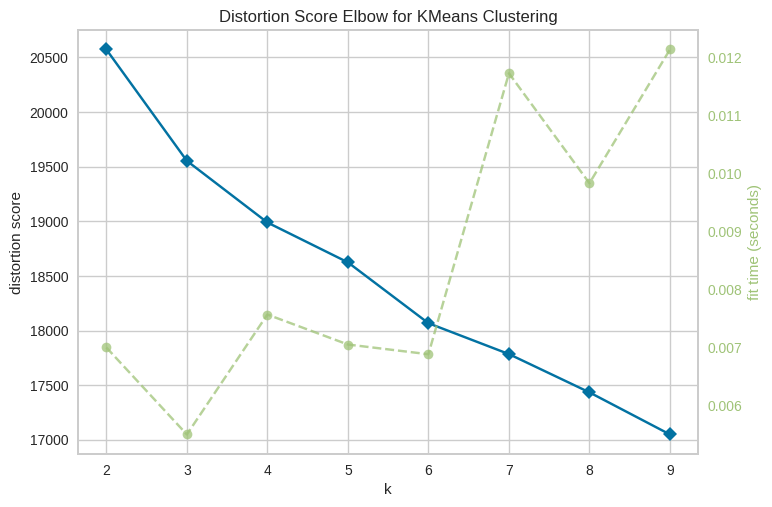

Jumlah cluster yang direkomendasikan: None
Jumlah optimal cluster tidak ditemukan. Menggunakan nilai default: 4.
Cuplikan dataset setelah penambahan label cluster:
     Engine_Size  Horsepower    Torque    Weight  Top_Speed  \
0     -0.625174   -1.020341 -0.507680  0.204254  -0.537530   
6     -0.355265   -0.035172  0.586374  0.944989  -0.440283   
7      1.372155    0.922210 -1.610198 -0.351834  -1.273836   
12    -1.488884    0.118918 -1.633476 -0.429128  -1.259944   
13     1.156228   -0.259993  0.886868 -1.277216   1.476891   

    Acceleration_0_100  Fuel_Efficiency  CO2_Emissions     Price   Mileage  \
0             0.780495         0.147046       0.332073 -1.309014 -0.430025   
6            -1.689464        -0.924411      -0.993512  0.997250  1.300571   
7             1.466594         0.872872      -0.679824 -0.928896  1.025529   
12            0.643275         1.287630       0.625523 -1.594108 -1.131847   
13           -0.248655         1.183940       0.736832  0.626754 -0.1667

In [379]:
num_columns = df_final.select_dtypes(include=[np.number])
X_scaled = num_columns.values #hanya kolom numerik yang di clustering
print("Dimensi dataset yang siap untuk clustering:", X_scaled.shape)

model = KMeans(random_state=42) #tentukan cluster terbaik dengan KElbow
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(X_scaled)
visualizer.show()

optimal_k = visualizer.elbow_value_
print("Jumlah cluster yang direkomendasikan:", optimal_k) #rekomendasi cluster

if optimal_k is None: #kalau tidak ada rekomendasi, menggunakan manual 4
    print("Jumlah optimal cluster tidak ditemukan. Menggunakan nilai default: 4.")
    optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=42) #penerapan KMeans
kmeans.fit(X_scaled)

df_final['Cluster'] = kmeans.labels_ #simpan dan tampilkan
print("Cuplikan dataset setelah penambahan label cluster:\n", df_final.head())

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

Nilai k = 2, Silhouette Score = 0.0817
Nilai k = 3, Silhouette Score = 0.0675
Nilai k = 4, Silhouette Score = 0.0540
Nilai k = 5, Silhouette Score = 0.0513
Nilai k = 6, Silhouette Score = 0.0519
Nilai k = 7, Silhouette Score = 0.0520
Nilai k = 8, Silhouette Score = 0.0529
Nilai k = 9, Silhouette Score = 0.0549
Nilai k = 10, Silhouette Score = 0.0536


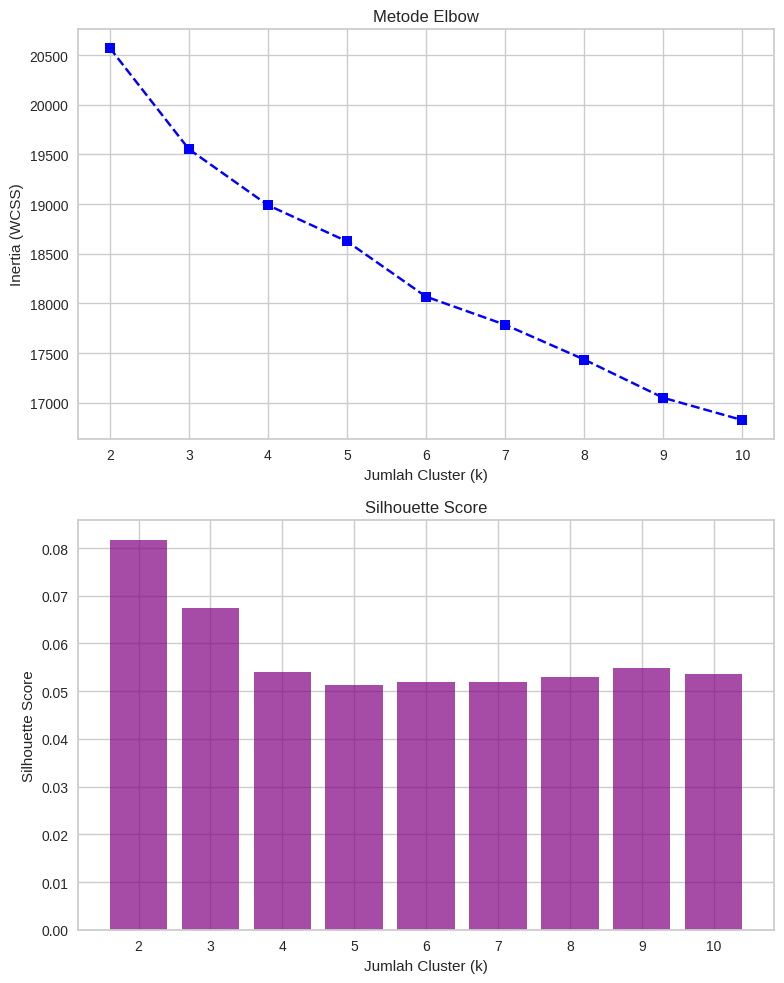

Silhouette Score untuk jumlah cluster optimal: 0.053994122577650155


In [380]:
#tetukan jumlah cluster yang diuji dalam rentang tertentu
range_n_clusters = list(range(2, 11))
inertia = []
silhouette_scores = []

#evaluasi KMeans untuk nilai k dalam rentang tertentu
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"Nilai k = {k}, Silhouette Score = {score:.4f}")

#visualisasi hasil evaluasi
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

#grafik Elbow
axes[0].plot(range_n_clusters,
             inertia,
             linestyle='--',
             marker='s',
             color='blue')
axes[0].set_title('Metode Elbow')
axes[0].set_xlabel('Jumlah Cluster (k)')
axes[0].set_ylabel('Inertia (WCSS)')
axes[0].grid(True)

#grafik silhouette
axes[1].bar(range_n_clusters,
            silhouette_scores,
            color='purple',
            alpha=0.7)
axes[1].set_title('Silhouette Score')
axes[1].set_xlabel('Jumlah Cluster (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_xticks(range_n_clusters)

plt.tight_layout()
plt.show()

#hitung dan menampilkan Silhouette Score cluster optimal
score = silhouette_score(X_scaled, df_final['Cluster'])
print("Silhouette Score untuk jumlah cluster optimal:", score)


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [381]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)  #pertahankan 95% variansi
X_pca = pca.fit_transform(X_scaled)
print("Jumlah komponen PCA:", pca.n_components_)

Jumlah komponen PCA: 14


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

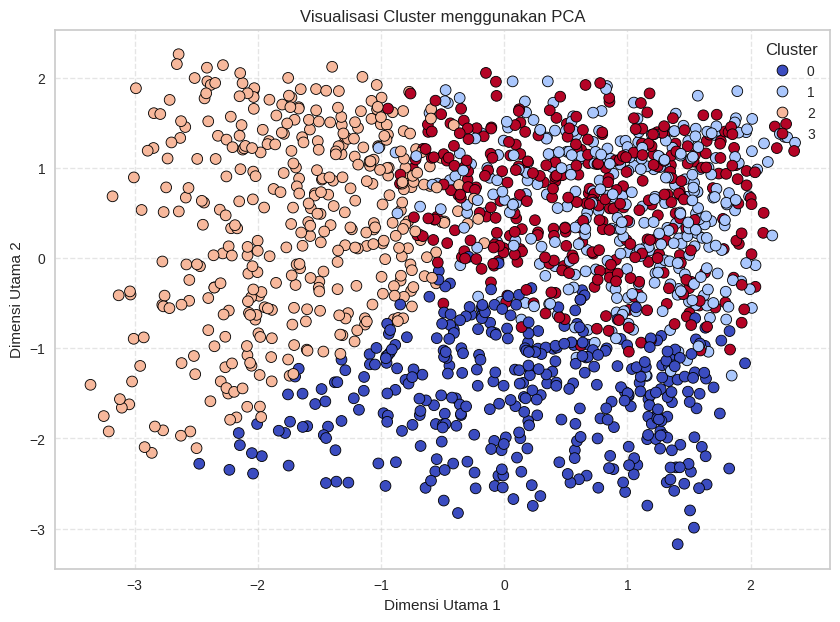

In [382]:
#gunakan PCA untuk mereduksi dimensi ke 2 komponen utama
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

#buat visualisasi hasil clustering
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0],
                y=X_pca[:, 1],
                hue=df_final['Cluster'],
                palette='coolwarm',
                s=60,
                edgecolor='black')
plt.title('Visualisasi Cluster menggunakan PCA')
plt.xlabel('Dimensi Utama 1')
plt.ylabel('Dimensi Utama 2')
plt.legend(title='Cluster', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

In [383]:
#sisipkan label cluster ke dalam df_encoded sebelum dilakukan proses scaling
df_encoded['Cluster'] = df_final['Cluster']

#hanya kolom numerik untuk analisis lebih lanjut
df_encoded_numeric = df_encoded.select_dtypes(include=[np.number])

#hitung rata-rata fitur setiap cluster, hanya menggunakan kolom numerik
cluster_means = df_encoded_numeric.groupby('Cluster').mean()
print("Rata-rata fitur berdasarkan cluster:\n", cluster_means)

#karakteristik setiap cluster
for i in range(optimal_k):
    print(f"\nAnalisis untuk Cluster {i}:")
    # Memastikan bahwa kolom yang dianalisis tersedia dan merupakan numerik
    print(cluster_means.loc[i][['Engine_Size', 'Horsepower', 'Torque', 'Weight', 'Top_Speed', 'Acceleration_0_100',
                                'Fuel_Efficiency', 'CO2_Emissions', 'Price', 'Mileage', 'Safety_Rating',
                                'Number_of_Owners', 'Insurance_Cost', 'Production_Units', 'Log_Price', 'Log_Mileage']])

Rata-rata fitur berdasarkan cluster:
          Engine_Size  Horsepower       Torque       Weight   Top_Speed  \
Cluster                                                                  
0.0         5.289333  838.176000   926.688000  1639.021333  273.440000   
1.0         4.562644  737.172414   921.376437  1945.172414  258.951149   
2.0         4.678117  754.804071   958.015267  1703.717557  274.458015   
3.0         5.007143  983.241758  1010.217033  1490.629121  295.917582   

         Acceleration_0_100  Fuel_Efficiency  CO2_Emissions          Price  \
Cluster                                                                      
0.0                4.576533        10.245600     272.853333  301943.333333   
1.0                5.387644        10.340517     277.146552  363122.787356   
2.0                4.743511        10.347837     273.424936  104131.402036   
3.0                3.599451         9.559341     273.947802  321418.714286   

               Mileage  Safety_Rating  Number_of

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Hasil interpretasinya:
1. Cluster 0:
- Kelompok mobil sport dengan performa tinggi yang masih dalam kondisi cukup baik. Mobil dalam kategori ini memiliki tenaga besar, akselerasi cepat, dan harga yang cukup mahal. Kendaraan ini cocok bagi pengguna yang mencari pengalaman berkendara yang dinamis dengan kombinasi antara kecepatan dan daya tahan.
2. Cluster 1:
- Kelompok mobil mewah dengan bobot yang lebih besar dan harga tertinggi di antara kelompok lainnya. Mobil dalam kategori ini sering digunakan untuk perjalanan jauh, menunjukkan bahwa pemiliknya lebih mengutamakan kenyamanan dan kemewahan daripada performa.
3. Cluster 2:
- Kelompok mobil kelas menengah yang lebih ekonomis. Mobil-mobil dalam cluster ini banyak digunakan dalam aktivitas sehari-hari dan memiliki harga yang lebih terjangkau dibandingkan kelompok lainnya. Kategori ini cocok untuk pembeli yang mencari kendaraan fungsional dengan biaya yang lebih rendah.

4. Cluster 3:
- Kelompok mobil berperforma sangat tinggi, yang kemungkinan besar merupakan supercar atau kendaraan sport kelas atas. Kendaraan dalam kelompok ini memiliki kecepatan luar biasa dengan akselerasi yang sangat cepat. Mobil ini biasanya diminati oleh pecinta otomotif yang mengutamakan performa tinggi dan eksklusivitas.



# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans berdasarkan data asli.

## Cluster 0:
- Rata-rata Engine Size: 5.29
- Rata-rata Horsepower: 838.18
- Rata-rata Torque: 926.69
- Rata-rata Weight: 1639.02
- Rata-rata Top Speed: 273.44
- Rata-rata Acceleration 0-100: 4.58
- Rata-rata Fuel Efficiency: 10.25
- Rata-rata CO2 Emissions: 272.85
- Rata-rata Price: 301,943.33
- Rata-rata Mileage: 53,297.03
- Rata-rata Safety Rating: 2.45
- Rata-rata Number of Owners: 2.58
- Rata-rata Insurance Cost: 6,900.65
- Rata-rata Production Units: 8,858.53
- Rata-rata Log Price: 12.54
- Rata-rata Log Mileage: 10.74

**Analisis:**
  Cluster ini terdiri dari kendaraan dengan ukuran mesin besar, tenaga kuda tinggi, dan kecepatan maksimum yang tinggi. Harga mobil dalam cluster ini tergolong tinggi, dengan konsumsi bahan bakar yang relatif boros.

**Insight:**
  Mobil dalam cluster ini cocok untuk segmen pasar premium yang mengutamakan performa dan daya tahan tinggi.


## Cluster 1:
- Rata-rata Engine Size: 4.56
- Rata-rata Horsepower: 737.17
- Rata-rata Torque: 921.38
- Rata-rata Weight: 1945.17
- Rata-rata Top Speed: 258.95
- Rata-rata Acceleration 0-100: 5.39
- Rata-rata Fuel Efficiency: 10.34
- Rata-rata CO2 Emissions: 277.15
- Rata-rata Price: 363,122.79
- Rata-rata Mileage: 173,090.37
- Rata-rata Safety Rating: 2.36
- Rata-rata Number of Owners: 2.36
- Rata-rata Insurance Cost: 7,615.12
- Rata-rata Production Units: 8,802.16
- Rata-rata Log Price: 12.77
- Rata-rata Log Mileage: 12.02

**Analisis:**  
  Cluster ini menunjukkan mobil dengan performa yang masih tinggi tetapi lebih berat dibanding cluster lainnya. Konsumsi bahan bakarnya tidak jauh berbeda dari cluster 0, tetapi harga mobil lebih tinggi.

**Insight:**  
  Mobil dalam cluster ini cocok untuk pengguna yang mencari kendaraan bertenaga tinggi dengan kapasitas lebih besar.

## Cluster 2:
- Rata-rata Engine Size: 4.68
- Rata-rata Horsepower: 754.80
- Rata-rata Torque: 958.02
- Rata-rata Weight: 1703.72
- Rata-rata Top Speed: 274.46
- Rata-rata Acceleration 0-100: 4.74
- Rata-rata Fuel Efficiency: 10.35
- Rata-rata CO2 Emissions: 273.42
- Rata-rata Price: 104,131.40
- Rata-rata Mileage: 143,727.24
- Rata-rata Safety Rating: 2.62
- Rata-rata Number of Owners: 2.45
- Rata-rata Insurance Cost: 7,595.57
- Rata-rata Production Units: 9,166.03
- Rata-rata Log Price: 11.44
- Rata-rata Log Mileage: 11.73

**Analisis:**  
  Mobil dalam cluster ini cenderung memiliki harga lebih rendah dibandingkan dengan cluster lainnya. Meskipun tenaga mesinnya cukup besar, harga dan biaya perawatannya lebih ekonomis.

**Insight:**  
  Cluster ini dapat menjadi target pasar untuk konsumen yang mencari kendaraan dengan performa tinggi tetapi dengan harga lebih terjangkau.

## Cluster 3:
- Rata-rata Engine Size: 5.01
- Rata-rata Horsepower: 983.24
- Rata-rata Torque: 1010.22
- Rata-rata Weight: 1490.63
- Rata-rata Top Speed: 295.92
- Rata-rata Acceleration 0-100: 3.60
- Rata-rata Fuel Efficiency: 9.56
- Rata-rata CO2 Emissions: 273.95
- Rata-rata Price: 321,418.71
- Rata-rata Mileage: 173,674.34
- Rata-rata Safety Rating: 2.58
- Rata-rata Number of Owners: 2.43
- Rata-rata Insurance Cost: 8,922.34
- Rata-rata Production Units: 9,478.57
- Rata-rata Log Price: 12.63
- Rata-rata Log Mileage: 12.02

**Analisis:**  
  Cluster ini memiliki kendaraan dengan tenaga dan performa tertinggi dibandingkan cluster lainnya. Kecepatan dan akselerasi sangat unggul, tetapi konsumsi bahan bakar cenderung lebih boros.

**Insight:**  
  Mobil dalam cluster ini ditujukan untuk segmen pasar yang mengutamakan performa tinggi dan tidak terlalu mempermasalahkan konsumsi bahan bakar serta biaya perawatan.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [384]:
df_encoded.to_csv('/content/Final Elite Sports Cars.csv', index=False)
print("Data telah dieksport.")

Data telah dieksport.
